# Programming Assignment - 7
---
## Name: Patrick McElroy
---

In [11]:
# Import required packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
from PIL import Image

np.random.seed(100)

## Question 1
---
Follow the example on Eigenfaces to find the eigenface representation of facial images from other sources. You should display some original images and compare them with their reconstructions upon PCA.

Here are some other facial image repositories.

>- The ORL database of faces at [ORL link](http://cam-orl.co.uk/facedatabase.html/#:~:text=Our%20Database%20of%20Faces%2C%20%28formerly%20%27The%20ORL%20Database,Robotics%20Group%20of%20the%20Cambridge%20University%20Engineering%20Department.).

>- The CBCL database of faces at [MIT link](http://cbcl.mit.edu/software-datasets/heisele/facerecognition-database.html).

>- Yale faces B facial images at [UCSD](http://vision.ucsd.edu/~leekc/ExtYaleDatabase/ExtYaleB.html).

In [12]:
f = r'/Users/patrickmcelroy/Desktop/Graduate School/MA 544/Python/Module 7/MIT-CBCL-facerec-database/test'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((200,200))
    img.save(f_img)

Dimensions of the array holdign all images: (2000, 200, 200)


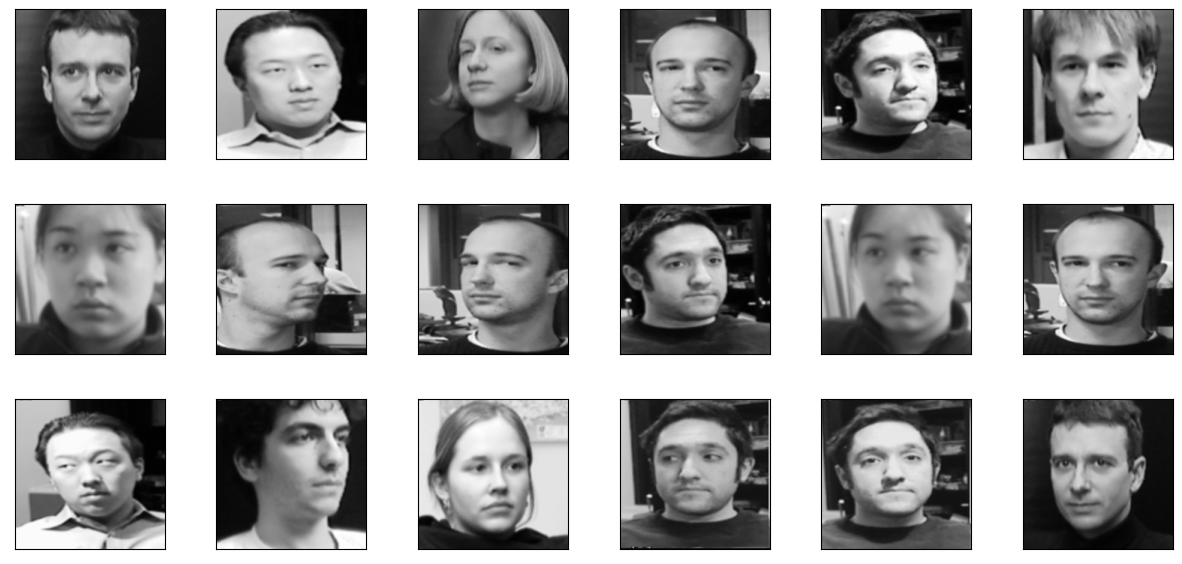

In [13]:
# Your code starts  here
"""This function helps visualising the portraits from the dataset."""
def plot_gallary(images, height, width, rows, cols):
    plt.figure(figsize=(2 * cols, 2 * rows))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.30,)
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((height, width)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())



# The folder of images
dir = '/Users/patrickmcelroy/Desktop/Graduate School/MA 544/Python/Module 7/MIT-CBCL-facerec-database/test'
#Find all the file names
subject_faces=os.listdir(dir)[0:]
#Relative path for every images file
subject_ones=np.array([dir+'/' + face for face in subject_faces])
#Read all the image files
all_images=np.array([plt.imread(face) for face in subject_ones], dtype=np.float64)
# Find the dimension of the ndarray holdig all the images
n_samples, h, w = all_images.shape
print("Dimensions of the array holdign all images:",all_images.shape)
# Show a few images
plot_gallary(all_images, h, w, rows=3, cols=6)


In [14]:
def eigenfaces(X, n_pc):
    # Find the number of features and samples
    ## Note that every row is an images in X in this code
    n_samples, n_features = X.shape
    # Find mean-face
    X_mean = np.mean(X, axis=0)
    centered_X = X-X_mean
    pca = PCA(n_components=n_pc)
    projected  = pca.fit_transform(centered_X)
    #U, S, V = np.linalg.svd(centered_data)
    components = pca.components_
    #projected = U[:,:n_pc]*S[:n_pc]
    
    return projected, components, X_mean, centered_X

In [15]:
n_components = 200
# Create the data matrix from all the images
X = all_images.reshape(n_samples, h*w)
P, C, M, Y= eigenfaces(X, n_components)

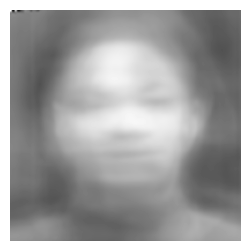

In [16]:
# The mean-face of some people
plt.figure(figsize=(3,3))
plt.axis('off')
plt.imshow(M.reshape((h, w)), cmap=plt.cm.gray)
plt.show()

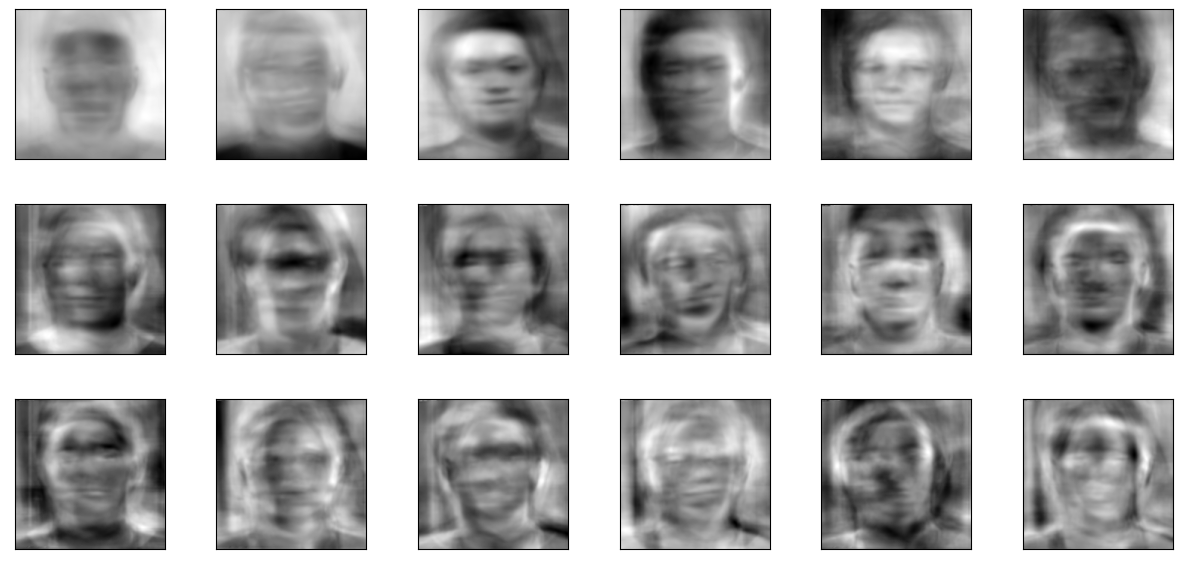

In [18]:
# Here is the face-space made of all the eigenface
eigenfaces = C.reshape((n_components, h, w))
# Give the eigenfaces some names.
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
# Let us see what the eigenfaces are
plot_gallary(eigenfaces, h, w, 3, 6)

In [20]:
def reconstruction(Y, C, M, h, w, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector).reshape(h, w)
    return recovered_image

recovered_images=[reconstruction(Y, C, M, h, w, i) for i in range(len(all_images))]

Some reconstructions:



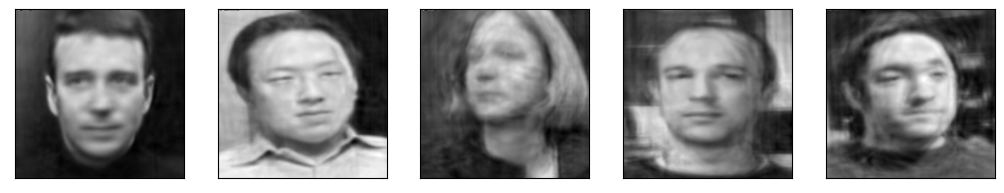

In [21]:
print("Some reconstructions:\n")
plot_gallary(recovered_images, h, w, rows=1, cols=5)

Compare with the originals:



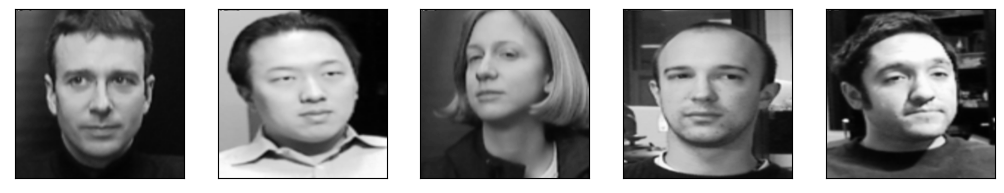

In [22]:
print("Compare with the originals:\n")
plot_gallary(all_images, h, w, rows=1, cols=5)